In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [12]:
lat_lngs = []
cities = []
lat_range = (-90, 90)
lng_range = (-180, 180)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city= citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


In [43]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_data = []
print("Beginning Data Retrieval.     ")
print("------------------------------")
record_count = 1
set_count = 1
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = f"{url}appid={weather_api_key}&q={city}"
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
   
    try:
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = (city_weather["main"]["temp_max"]) - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        city_data.append({"City": city,
                     "Lat": city_lat,
                     "Lng": city_lon,
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed": city_wind, 
                     "Country": city_country,
                     "Date": city_date})
    except:
        print:("City not found... skipping")
        pass
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")
        

Beginning Data Retrieval.     
------------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | tutoia
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | taolanaro
Processing Record 10 of Set 1 | jasdan
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | antalaha
Processing Record 13 of Set 1 | sobreira
Processing Record 14 of Set 1 | mys shmidta
Processing Record 15 of Set 1 | hofn
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | den helder
Processing Record 20 of Set 1 | westport
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | alofi
Processing Record 23 of Set 1 | bar

Processing Record 48 of Set 4 | alekseyevka
Processing Record 49 of Set 4 | uarini
Processing Record 0 of Set 5 | qui nhon
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | kamenka
Processing Record 3 of Set 5 | najran
Processing Record 4 of Set 5 | itarema
Processing Record 5 of Set 5 | sobolevo
Processing Record 6 of Set 5 | batagay
Processing Record 7 of Set 5 | ilulissat
Processing Record 8 of Set 5 | half moon bay
Processing Record 9 of Set 5 | kerema
Processing Record 10 of Set 5 | ostrovnoy
Processing Record 11 of Set 5 | yellowknife
Processing Record 12 of Set 5 | bonga
Processing Record 13 of Set 5 | halifax
Processing Record 14 of Set 5 | esperance
Processing Record 15 of Set 5 | fredericksburg
Processing Record 16 of Set 5 | batagay-alyta
Processing Record 17 of Set 5 | sorland
Processing Record 18 of Set 5 | qasigiannguit
Processing Record 19 of Set 5 | parabel
Processing Record 20 of Set 5 | sorvag
Processing Record 21 of Set 5 | dunedin
Pr

Processing Record 49 of Set 8 | usinsk
Processing Record 0 of Set 9 | manzhouli
Processing Record 1 of Set 9 | bathurst
Processing Record 2 of Set 9 | souillac
Processing Record 3 of Set 9 | xianyang
Processing Record 4 of Set 9 | hirado
Processing Record 5 of Set 9 | nizhneyansk
Processing Record 6 of Set 9 | rampura
Processing Record 7 of Set 9 | auki
Processing Record 8 of Set 9 | salinopolis
Processing Record 9 of Set 9 | sola
Processing Record 10 of Set 9 | portoferraio
Processing Record 11 of Set 9 | shuyskoye
Processing Record 12 of Set 9 | dores do indaia
Processing Record 13 of Set 9 | makakilo city
Processing Record 14 of Set 9 | luwuk
Processing Record 15 of Set 9 | dryden
Processing Record 16 of Set 9 | lagoa
Processing Record 17 of Set 9 | trairi
Processing Record 18 of Set 9 | barbar
Processing Record 19 of Set 9 | kinwat
Processing Record 20 of Set 9 | paka
Processing Record 21 of Set 9 | khash
Processing Record 22 of Set 9 | fort nelson
Processing Record 23 of Set 9 | n

Processing Record 47 of Set 12 | novita
Processing Record 48 of Set 12 | katsuura
Processing Record 49 of Set 12 | goulburn
Processing Record 0 of Set 13 | bilma
Processing Record 1 of Set 13 | el carmen
Processing Record 2 of Set 13 | rehoboth
Processing Record 3 of Set 13 | teguise
Processing Record 4 of Set 13 | mount gambier
Processing Record 5 of Set 13 | ngunguru
Processing Record 6 of Set 13 | matamoros
Processing Record 7 of Set 13 | treinta y tres
Processing Record 8 of Set 13 | marawi
Processing Record 9 of Set 13 | haibowan
Processing Record 10 of Set 13 | el tigre
Processing Record 11 of Set 13 | lagos
Processing Record 12 of Set 13 | caxito
Processing Record 13 of Set 13 | loa janan
Processing Record 14 of Set 13 | baiyin
Processing Record 15 of Set 13 | bagan
Processing Record 16 of Set 13 | sibi
Processing Record 17 of Set 13 | markova
Processing Record 18 of Set 13 | petropavlovsk-kamchatskiy
Processing Record 19 of Set 13 | mumbwa
Processing Record 20 of Set 13 | armid

In [44]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()


City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [45]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,24.11,91,100,3.32,BR,1675307374
1,bluff,-46.6000,168.3333,17.98,92,85,5.69,NZ,1675306989
2,ribeira grande,38.5167,-28.7000,12.10,81,20,1.79,PT,1675307010
3,hobart,-42.8794,147.3294,18.92,48,75,9.26,AU,1675306971
4,mataura,-46.1927,168.8643,22.04,76,100,1.91,NZ,1675306959


In [46]:
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [47]:
city_data_df= pd.read_csv("cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,24.11,91,100,3.32,BR,1675307374
1,bluff,-46.6000,168.3333,17.98,92,85,5.69,NZ,1675306989
2,ribeira grande,38.5167,-28.7000,12.10,81,20,1.79,PT,1675307010
3,hobart,-42.8794,147.3294,18.92,48,75,9.26,AU,1675306971
4,mataura,-46.1927,168.8643,22.04,76,100,1.91,NZ,1675306959


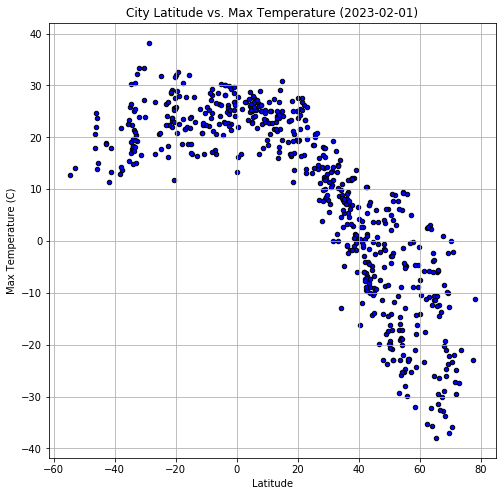

In [55]:
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", marker='o', grid=True, color='b', edgecolors="black", figsize=(8,8))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-02-01)")
plt.savefig("Fig1.png")
plt.show()


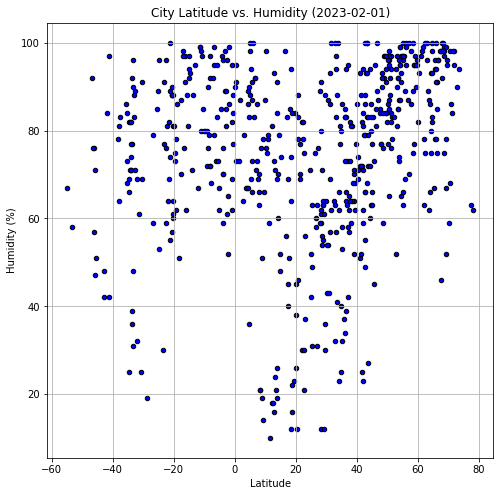

In [56]:
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", marker='o', grid=True, color='b', edgecolors="black", figsize=(8,8))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-01)")
plt.savefig("Fig2.png")
plt.show()

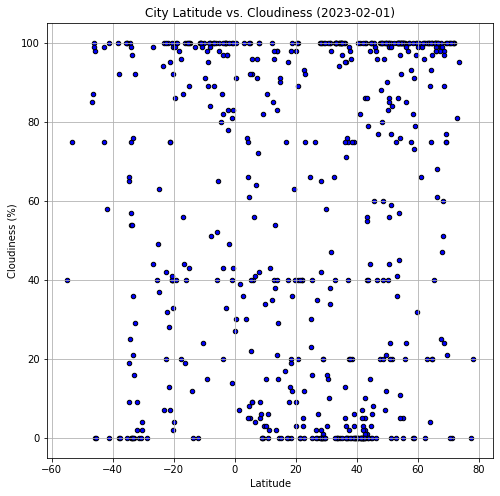

In [58]:
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", marker='o', grid=True, color='b', edgecolors="black", figsize=(8,8))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-01)")
plt.savefig("Fig3.png")
plt.show()

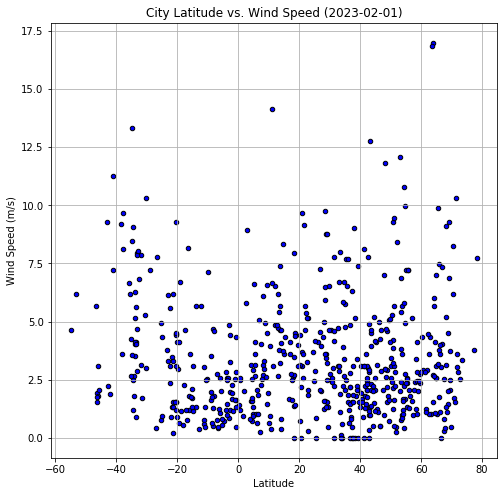

In [59]:
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker='o', grid=True, color='b', edgecolors="black", figsize=(8,8))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-01)")
plt.savefig("Fig4.png")
plt.show()

In [67]:
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ribeira grande,38.5167,-28.7000,12.10,81,20,1.79,PT,1675307010
6,pevek,69.7008,170.3133,-22.16,95,21,0.46,RU,1675307021
8,jasdan,22.0333,71.2000,16.61,30,40,5.68,IN,1675307375
9,severo-kurilsk,50.6789,156.1250,-4.30,65,44,3.88,RU,1675307338
11,sobreira,41.5237,-7.8023,2.75,88,0,2.23,PT,1675307376


In [68]:
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,24.11,91,100,3.32,BR,1675307374
1,bluff,-46.6000,168.3333,17.98,92,85,5.69,NZ,1675306989
3,hobart,-42.8794,147.3294,18.92,48,75,9.26,AU,1675306971
4,mataura,-46.1927,168.8643,22.04,76,100,1.91,NZ,1675306959
5,tutoia,-2.7619,-42.2744,26.13,85,100,4.43,BR,1675307375
